In [143]:
import pandas as pd
import numpy as np
import os

In [144]:
cwd = os.getcwd()
print(cwd)

# For this to work, a copy of the original dataset must be saved as a CSV
main_dataset_path = cwd + "/MSF_Dataset_Complete_450.csv"
df = pd.read_csv(main_dataset_path)

C:\Users\Nick\Desktop\PROJECTS\MotherSignificantFeatureProject


I'm going to try and update Nick's previous helper function to classify this new dataset.

In [145]:
df.shape

(450, 325)

In [146]:
df.head()

,Mother_UID,1,2,3,4,5,6,7,8,9,...,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323,Unnamed: 324
0,1,29,59,60.0,156,25,12.5,0,31,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,24,54,56.0,145,26,12.5,0,28,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,28,62,65.0,151,28,11.5,0,31,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,25,49,52.0,151,22,11.5,0,30,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,21,39,42.0,151,18,10.1,0,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# the sample ID is useless to us, so for simplicity it will be dropped
del df['Mother_UID']

In [148]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323,Unnamed: 324
0,29,59,60.0,156,25,12.5,0,31,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,54,56.0,145,26,12.5,0,28,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,62,65.0,151,28,11.5,0,31,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,49,52.0,151,22,11.5,0,30,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,39,42.0,151,18,10.1,0,25,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There shouldn't be 324 columns, if memory serves correctly we should only have about 130.
It looks like the additional columns are mostly NaNs, so a null table will be created to see what's going on.

In [149]:
nulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print (nulltable)

1                 0
2                 0
3               250
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12              250
13                0
14              250
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
34                0
35                0
36                0
37                0
38                0
39                0
40                0
41                0
42                0
43                0
44                0
45                0
46                0
47                0
48                0
49                0
50                0


So we can see that anything after 130 are full of NaNs and therefore useless.
We'll drop them below.

In [150]:
df = df.dropna(axis = 1, how = 'all')

Now let's look at a preview of the dataset and the new null table. 

In [151]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
0,29,59,60.0,156,25,12.5,0,31,5,0,...,1,1,2.566,5,0,0,0,1,18,0
1,24,54,56.0,145,26,12.5,0,28,2,0,...,1,1,3.100,5,0,0,0,1,20,0
2,28,62,65.0,151,28,11.5,0,31,4,0,...,1,1,2.150,7,0,0,1,0,5,0
3,25,49,52.0,151,22,11.5,0,30,3,0,...,1,1,2.500,5,0,0,0,1,10,0
4,21,39,42.0,151,18,10.1,0,25,2,0,...,1,1,2.670,5,0,0,0,1,20,0


In [152]:
df = df.dropna(axis = 1, how = 'any')

# When we get to train_test split, there will be a problem because our label column (112) contains an errant value of 3. If we leave that in stratified splitting will not work, because there will be one group of one value, namely the aforementioned 3. To solve this, we will just drop that row from the whole data frame before making our X and y distinctions.


In [153]:
df = df[df['112'] != 3]

In [154]:
new_nulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print (new_nulltable)

1      0
2      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
13     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
93     0
94     0
95     0
96     0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
114    0
115    0
116    0
117    0
119    0
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    0
130    0
dtype: int64


In [155]:
df.shape  #question: which columns specifically did we drop with that any null command?

(449, 108)

Since everything is in order, we can continue on with the next steps.

Now we'll try to use the helper function to transform the features that are categorical.

Import Nick's function, with a few changes made to match the new dataset codebook.

In [156]:
from MSFHelpFunc import *

In [157]:
codebook_path = cwd + "/MSF Dataset Codebook Updated.xlsx"
df_code = pd.read_excel(codebook_path, index_col = None, header = 1)

In [158]:
df_code.head()

,Variable Topic,Variable Name,Variable Label,Variable Type,Variable Unit\n(if Numeric),Variable Code List\n(if Coded)
0,Age_Of_Mother,1,mother's age,Numeric,Years,NaN
1,weight_before_preg,2,mother's weight before pregnancy,Numeric,kg,NaN
2,wt_before_delivery,3,mother's weight before delivery,Numeric,kg,NaN
3,Height(cm),4,mother's height,Numeric,cm,NaN
4,BMI,5,mother's BMI,Numeric,BMI,NaN


It is important to note that due to the format of the dataset the variable name column is useless. Instead we have to focus on the column number column.

First we'll distinct between labels and features.

In [159]:
labels = df['112']
features = df.drop('112', axis = 1)

In [160]:
print(features.shape)
print(labels.shape)

(449, 107)
(449,)


In [161]:
labels = pd.Series(labels)

In [162]:
df_code.shape

(130, 6)

In [163]:
removed_columns_Nans = ['3',
                        '12',
                        '14',
                        '57',   
                        '58',     
                        '59',     
                        '60',     
                        '61',     
                        '62',     
                        '63',     
                        '64',     
                        '65',     
                        '66',
                        '92',
                        '97',
                        '98',
                        '99',
                        '100',
                        '101',
                        '102',
                        '113',
                        '118',
                        '112'] ### included because it is target variable

In [164]:
df_code = df_code[~df_code['Variable Name'].isin(removed_columns_Nans)]

In [165]:
df_code.shape

(107, 6)

I can't get it to work at all, I keep getting a single indexer out of bounds error. I tried to write a helper function from scratch but I wasn't successful. 

Since we have a small enough dataset, I can just list the categorical variable numbers and pair them that way.

In [166]:
## Values are commented out because they were removed due to the 250 null values
cat_cols_list = ['7',
                '10',
                '11',
                '13',
                '15',
                '16',
                '17',
                '18',
                '19',
                '20',
                '21',
                '22',
                '23',
                '24',
                '25',
                '26',
                '27',
                '28',
                '29',
                '30',
                '31',
                '32',
                '33',
                '34',
                '35',
                '36',
                '37',
                '38',
                '39',
                '40',
                '41',
                '42',
                '43',
                '44',
                '45',
                '46',
                '47',
                '48',
                '49',
                '50',
                '51',
                '52',
                '53',
                '54',
                '55',
                '56',
                #'57',
                #'58',
                #'59',
                #'60',
                #'61',
                #'62',
                #'63',
                #'64',
                #'65',
                #'66',
                '67',
                '68',
                '69',
                '70',
                '71',
                '72',
                '73',
                '74',
                '75',
                '76',
                '77',
                '78',
                '79',
                '80',
                '81',
                '82',
                '83',
                '84',
                '85',
                '86',
                '87',
                '88',
                '89',
                '90',
                '91',
                #'92',
                '93',
                '94',
                '95',
                '96',
                #'97',
                #'98',
                #'99',
                #'100',
                #'101',
                #'102',
                '103',
                '104',
                '105',
                '106',
                '107',
                '108',
                '109',
                '110',
                '111',
                ##'112', Removed because target variable
                #'113',
                '114',
                '115',
                '116',
                '117',
                #'118',
                '119',
                '120',
                '121',
                '125',
                '126',
                '127',
                '128',
                '130']

In [167]:
num_cols_list = ['1',
                 '2',
                 #'3',
                 '4',
                 '5',
                 '6',
                 '8',
                 '9',
                 #'12',
                 #'14',
                 '122',
                 '123',
                 '124',
                 '129']

In [168]:
cat_cols = df[cat_cols_list]
num_cols = df[num_cols_list]

In [169]:
cat_cols

,7,10,11,13,15,16,17,18,19,20,...,116,117,119,120,121,125,126,127,128,130
0,0,0,1,5,3,3,3,2,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,4,4,4,4,3,3,3,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,4,3,3,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,4,4,4,4,3,3,3,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,3,4,4,4,1,1,1,...,0,0,0,0,1,0,0,0,1,0
5,0,0,1,3,4,4,4,3,3,3,...,0,0,0,0,1,0,0,1,0,0
6,0,0,0,3,3,3,3,3,3,3,...,0,0,0,1,0,1,1,1,0,0
7,0,0,0,4,4,4,4,3,3,3,...,0,0,0,0,1,0,1,0,1,0
8,0,0,1,5,3,3,3,3,3,3,...,0,0,0,0,1,0,0,1,0,0
9,0,0,1,5,3,3,3,2,2,2,...,0,0,0,0,1,0,0,1,0,0


In [170]:
num_cols

,1,2,4,5,6,8,9,122,123,124,129
0,29,59,156,25,12.50,31,5,1,2.5660,5,18
1,24,54,145,26,12.50,28,2,1,3.1000,5,20
2,28,62,151,28,11.50,31,4,1,2.1500,7,5
3,25,49,151,22,11.50,30,3,1,2.5000,5,10
4,21,39,151,18,10.10,25,2,1,2.6700,5,20
5,32,56,156,24,10.50,38,8,1,2.5600,7,10
6,23,40,141,21,11.50,26,2,1,2.1000,7,18
7,23,52,159,21,12.50,27,2,1,2.5000,5,20
8,29,59,149,27,11.20,33,4,1,2.9400,7,12
9,28,69,156,29,12.90,31,4,1,2.9000,7,15


In [171]:
features_encoded = pd.get_dummies(features, columns = cat_cols_list)

In [172]:
features_encoded

,1,2,4,5,6,8,9,122,123,124,...,125_1,126_0,126_1,127_0,127_1,128_0,128_1,128_20,130_0,130_1
0,29,59,156,25,12.50,31,5,1,2.5660,5,...,0,1,0,1,0,0,1,0,1,0
1,24,54,145,26,12.50,28,2,1,3.1000,5,...,0,1,0,1,0,0,1,0,1,0
2,28,62,151,28,11.50,31,4,1,2.1500,7,...,0,1,0,0,1,1,0,0,1,0
3,25,49,151,22,11.50,30,3,1,2.5000,5,...,0,1,0,1,0,0,1,0,1,0
4,21,39,151,18,10.10,25,2,1,2.6700,5,...,0,1,0,1,0,0,1,0,1,0
5,32,56,156,24,10.50,38,8,1,2.5600,7,...,0,1,0,0,1,1,0,0,1,0
6,23,40,141,21,11.50,26,2,1,2.1000,7,...,1,0,1,0,1,1,0,0,1,0
7,23,52,159,21,12.50,27,2,1,2.5000,5,...,0,0,1,1,0,0,1,0,1,0
8,29,59,149,27,11.20,33,4,1,2.9400,7,...,0,1,0,0,1,1,0,0,1,0
9,28,69,156,29,12.90,31,4,1,2.9000,7,...,0,1,0,0,1,1,0,0,1,0


In [173]:
X = features_encoded
y = labels

In [174]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [175]:
X_nulltable = X.isnull().sum()
pd.set_option('display.max_rows', None)
print (X_nulltable)

1         0
2         0
4         0
5         0
6         0
8         0
9         0
122       0
123       0
124       0
129       0
7_0       0
7_1       0
10_0      0
10_1      0
11_0      0
11_1      0
13_0      0
13_1      0
13_2      0
13_3      0
13_4      0
13_5      0
13_6      0
15_1      0
15_2      0
15_3      0
15_4      0
16_1      0
16_2      0
16_3      0
16_4      0
17_1      0
17_2      0
17_3      0
17_4      0
18_1      0
18_2      0
18_3      0
18_4      0
19_1      0
19_2      0
19_3      0
19_4      0
20_1      0
20_2      0
20_3      0
20_4      0
21_1      0
21_2      0
21_3      0
21_4      0
22_1      0
22_2      0
22_3      0
22_4      0
23_1      0
23_2      0
23_3      0
23_4      0
24_1      0
24_2      0
24_3      0
25_1      0
25_2      0
25_3      0
26_1      0
26_2      0
26_3      0
27_1      0
27_2      0
28_1      0
28_2      0
29_1      0
29_2      0
30_1      0
30_2      0
31_1      0
31_2      0
32_1      0
32_2      0
33_1      0
33_2      0
33_3

In [176]:
number_of_desired_vars = 10
selector = SelectKBest(score_func = chi2, k= number_of_desired_vars)
fit = selector.fit(X, y)

selectedcols = selector.get_support(indices=True)

X = X.iloc[:,selectedcols]

w = zip(features_encoded.columns, fit.scores_)

list_of_vars = list(w)

list_of_vars.sort(key = lambda x:x[1], reverse = True)

for i in range(number_of_desired_vars):
    coded_label = list_of_vars[i][0]
    print(coded_label)
    print('*******************************')

11_1
*******************************
11_0
*******************************
9
*******************************
1
*******************************
8
*******************************
2
*******************************
129
*******************************
10_1
*******************************
111_1
*******************************
104_4
*******************************


# TODO Add decoder to figure out what these columns specifically are:

In [177]:
print("In our data set, {} subjects have some form of hypertension.".format(len(X[y==1])))
print("In our data set, {} subjects have no form of hypertension.".format(len(X[y==0])))

In our data set, 220 subjects have some form of hypertension.
In our data set, 229 subjects have no form of hypertension.


In [178]:
yes_h = len(X[y==1])
no_h = len(X[y==0])
total_h = yes_h + no_h
print("A hypothetical model that simply predicted no-hypertension would be accurate {:.2%} of the time.".format(no_h / total_h))

A hypothetical model that simply predicted no-hypertension would be accurate 51.00% of the time.


In [179]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      1
4      0
5      1
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     1
14     0
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     0
26     0
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     1
35     1
36     0
37     0
38     0
39     1
40     0
41     0
42     1
43     1
44     0
45     0
46     1
47     1
48     0
49     1
50     1
51     1
52     1
53     0
54     0
55     1
56     1
57     0
58     0
59     1
60     1
61     1
62     1
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     1
73     0
74     0
75     1
76     0
77     0
78     1
79     0
80     1
81     1
82     0
83     1
84     1
85     0
86     0
87     1
88     0
89     0
90     1
91     0
92     0
93     0
94     0
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    0
104    0
105    1
10

In [180]:
y.shape
X.shape

(449, 10)

In [181]:
y.value_counts()

0    229
1    220
Name: 112, dtype: int64

In [182]:
 y = y[y != 3]

In [183]:
y.value_counts()

0    229
1    220
Name: 112, dtype: int64

## Random Forest Model

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle=True, stratify=y) 

In [185]:
from datetime import datetime # for timing algorithms

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.model_selection import GridSearchCV # to try out different hyperparameters


rf_class = RandomForestClassifier(criterion = 'gini',) #note, deleted the num of estimators. We will use the gridsearch to find that.


#let's make this a little smarter.
clf_cv = GridSearchCV(rf_class, {
    'n_estimators': [2, 10, 50, 100],
    'max_depth': [None, 2, 5, 10, 100],
    'min_samples_split': [5, 10, 20],
    'max_features': ['auto', 5, 10],
    'bootstrap': [True, False],
    'n_jobs': [-1]
}, cv=10)

print(f'operation started at {datetime.now()}')
start = datetime.now()
clf_cv.fit(X_train, y_train)
results = pd.DataFrame(clf_cv.cv_results_)
print(f'operation completed at {datetime.now()}')
print(f'that took {datetime.now()-start}')
results


operation started at 2021-11-06 16:20:54.766502
operation completed at 2021-11-06 16:23:40.532665
that took 0:02:45.766163


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_n_jobs,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.513730,4.373006e-01,0.004689,7.162171e-03,True,None,auto,5,2,-1,...,1.0,1.000000,1.000000,1.000000,0.878788,1.000000,1.0,0.984938,0.036454,360
1,0.011590,6.391203e-03,0.006903,7.368822e-03,True,None,auto,5,10,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
2,0.043892,5.337866e-03,0.014715,5.275212e-03,True,None,auto,5,50,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
3,0.079945,7.146340e-03,0.015621,3.388649e-06,True,None,auto,5,100,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
4,0.006250,7.654626e-03,0.002214,4.875982e-03,True,None,auto,10,2,-1,...,1.0,1.000000,0.970588,1.000000,1.000000,1.000000,1.0,0.997059,0.008824,341
5,0.011589,6.392027e-03,0.006901,7.366760e-03,True,None,auto,10,10,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
6,0.047925,6.958558e-03,0.011589,6.390300e-03,True,None,auto,10,50,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
7,0.083060,7.614613e-03,0.015334,7.373472e-03,True,None,auto,10,100,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1
8,0.007814,7.813573e-03,0.000000,0.000000e+00,True,None,auto,20,2,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,0.939394,1.0,0.993939,0.018182,350
9,0.012501,6.250538e-03,0.004428,6.142129e-03,True,None,auto,20,10,-1,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1


In [187]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_max_depth', 'param_max_features',
       'param_min_samples_split', 'param_n_estimators', 'param_n_jobs',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [188]:
results[['param_bootstrap', 'param_max_depth', 'param_max_features',
       'param_min_samples_split', 'param_n_estimators', 'param_n_jobs', 'mean_test_score']]

,param_bootstrap,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_n_jobs,mean_test_score
0,True,None,auto,5,2,-1,0.984938
1,True,None,auto,5,10,-1,1.000000
2,True,None,auto,5,50,-1,1.000000
3,True,None,auto,5,100,-1,1.000000
4,True,None,auto,10,2,-1,0.997059
5,True,None,auto,10,10,-1,1.000000
6,True,None,auto,10,50,-1,1.000000
7,True,None,auto,10,100,-1,1.000000
8,True,None,auto,20,2,-1,0.993939
9,True,None,auto,20,10,-1,1.000000


/Users/roshnaey/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

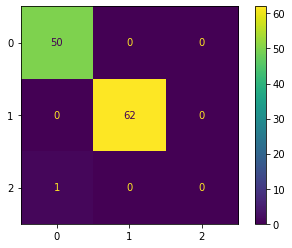

In [149]:
plot_confusion_matrix(rf_class, 
                      X_test, 
                      y_test, 
                      display_labels=["0 - No Hypertension", "1 - Hypertension"])

Not sure where the extra column comes from

In [150]:
X.columns

Index(['1', '8', '9', '11_0', '11_1', '11_3', '13_0', '103_4', '111_0',
       '114_0'],
      dtype='object')

I'm a bit confused now as these columns don't correspond to the ones listed after the selectKBest algorithm.
I'll look into it more tonight/tomorrow morning.